In [23]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:

# Load the dataset
netflix_data = pd.read_csv(r"C:\Users\Work\OneDrive - University of Salford\MLDM Assesement\netflix-task-3.csv")  

netflix_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
1904,s1905,Movie,Carlos Almaraz: Playing with Fire,"Elsa Flores Almaraz, Richard J Montoya","Edward James Olmos, Zach De La Rocha",United States,1-Oct-20,2019,TV-14,83 min,"Documentaries, LGBTQ Movies","Mixing archival footage with interviews, this ..."
1905,s1906,Movie,Cold Harbour,Carey McKenzie,"Tony Kgoroge, Yu Nan, Thomas Gumede, Deon Lotz...",South Africa,1-Oct-20,2013,TV-MA,73 min,"Action & Adventure, Dramas, International Movies",When a war breaks out between competing gangs ...
1906,s1907,TV Show,Evil,NaN,"Katja Herbers, Mike Colter, Aasif Mandvi, Mich...",United States,1-Oct-20,2019,TV-14,1 Season,TV Dramas,A forensic psychologist partners with a Cathol...
1907,s1908,TV Show,Familiar Wife,NaN,"Ji Sung, Han Ji-min, Kang Han-na, Jang Seung-jo",South Korea,1-Oct-20,2018,TV-MA,1 Season,"International TV Shows, Romantic TV Shows, TV ...",After receiving a bizarre chance to go back in...


In [25]:
# function for basic text preprocessing
def basic_preprocess_text(text):
    # Convert text to lowercase for uniformity
    text = text.lower()
    # Remove special characters and numbers to focus only on words
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    return text


netflix_data['basic_cleaned_description'] = netflix_data['description'].apply(basic_preprocess_text)

# Convert 'date_added' to datetime format
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'], errors='coerce')

C:\Users\Work\AppData\Local\Temp\ipykernel_6008\2841666036.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'], errors='coerce')


In [26]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Initializing the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# English stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenization and lowercasing
    tokens = word_tokenize(text.lower())

    # Removing stopwords and lemmatizing
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and token.isalpha()]

    # Joining the tokens back into a string
    return ' '.join(lemmatized_tokens)

netflix_data['processed_description'] = netflix_data['description'].apply(preprocess_text)


netflix_data[['description', 'processed_description']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Work\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Work\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Work\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,description,processed_description
0,"As her father nears the end of his life, filmm...",father nears end life filmmaker kirsten johnso...
1,"After crossing paths at a party, a Cape Town t...",crossing path party cape town teen set prove w...
2,To protect his family from a powerful drug lor...,protect family powerful drug lord skilled thie...
3,"Feuds, flirtations and toilet talk go down amo...",feud flirtation toilet talk go among incarcera...
4,In a city of coaching centers known to train I...,city coaching center known train finest colleg...


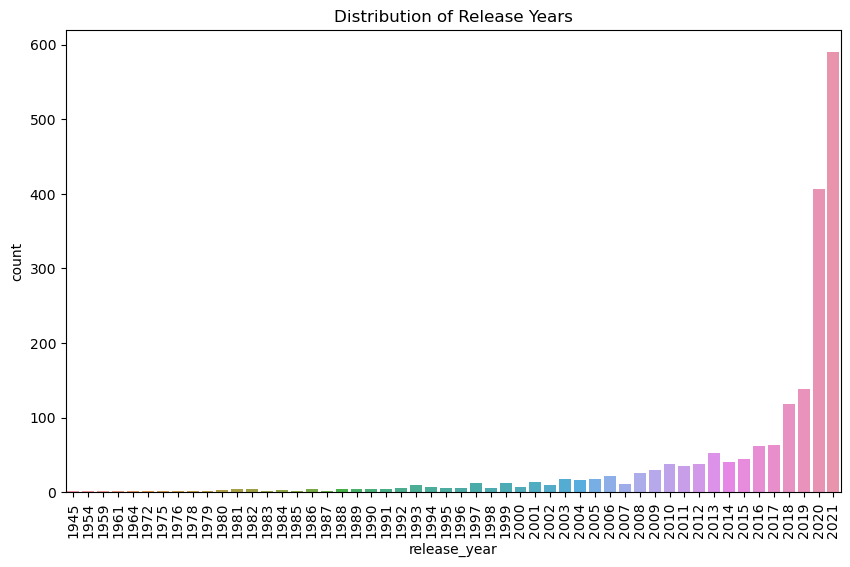

Top 10 Genres:
 listed_in
Dramas, International Movies                        79
Kids' TV                                            61
Children & Family Movies                            58
Comedies, Dramas, International Movies              57
Children & Family Movies, Comedies                  53
Action & Adventure                                  48
Documentaries                                       45
Dramas, International Movies, Romantic Movies       45
Dramas                                              37
Dramas, Independent Movies, International Movies    36
Name: count, dtype: int64
Top 10 Countries:
 country
United States            573
India                    128
United Kingdom            59
Japan                     50
South Korea               41
Turkey                    31
Nigeria                   30
Philippines               27
Canada                    27
United States, Canada     26
Name: count, dtype: int64


In [27]:
# Check the distribution of release years
plt.figure(figsize=(10, 6))
sns.countplot(x='release_year', data=netflix_data)
plt.title('Distribution of Release Years')
plt.xticks(rotation=90)
plt.show()

# Check the distribution of genres 
genre_counts = netflix_data['listed_in'].value_counts()
print("================================================")
print("Top 10 Genres:\n", genre_counts.head(10))

# Check the distribution of countries
country_counts = netflix_data['country'].value_counts()

print("================================================")
print("Top 10 Countries:\n", country_counts.head(10))

In [28]:
# Counting occurrences of directors
top_directors = netflix_data['director'].dropna().value_counts().head(5)
print("Top 5 Directors on Netflix:\n", top_directors)

print("================================================")

# Extracting and counting actors
all_actors = netflix_data['cast'].dropna().str.split(', ').sum()
top_actors = pd.Series(all_actors).value_counts().head(5)
print("Top 5 Actors on Netflix:\n", top_actors)

 


Top 5 Directors on Netflix:
 director
Rajiv Chilaka          16
Suhas Kadav            15
Hidenori Inoue          7
Cathy Garcia-Molina     6
Lasse HallstrÃ¶m        5
Name: count, dtype: int64
Top 5 Actors on Netflix:
 Rupa Bhimani      22
Julie Tejwani     22
Rajesh Kava       21
Jigna Bhardwaj    19
Vatsal Dubey      17
Name: count, dtype: int64


In [29]:
# Calculate the percentage of missing data in each column
missing_data_percentage = netflix_data.isnull().sum() / len(netflix_data) * 100

# Display the percentage of missing data
print(missing_data_percentage)

show_id                       0.000000
type                          0.000000
title                         0.000000
director                     32.425354
cast                          9.900471
country                      19.905710
date_added                    0.000000
release_year                  0.000000
rating                        0.000000
duration                      0.000000
listed_in                     0.000000
description                   0.000000
basic_cleaned_description     0.000000
processed_description         0.000000
dtype: float64


In [30]:
# Handling missing values
netflix_data['country'].fillna('Unknown', inplace=True)
netflix_data['cast'].fillna('Unknown', inplace=True)
netflix_data['director'].fillna('Unknown', inplace=True)


In [31]:
# Print the number of rows in the dataset after handling missing values
print("Number of rows in the dataset after handling missing values:", netflix_data.shape[0])


Number of rows in the dataset after handling missing values: 1909


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# transforms the text into a more manageeable and analyzable format 
tfidf_features = tfidf_vectorizer.fit_transform(netflix_data['basic_cleaned_description'])

print(tfidf_features.shape)   


(1909, 1000)


# Sentiment Analysis

In [33]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Work\AppData\Roaming\nltk_data...


True

In [34]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment_score(text):
    return sia.polarity_scores(text)['compound']  

# Apply the function to get sentiment score for each description
netflix_data['sentiment_score'] = netflix_data['basic_cleaned_description'].apply(get_sentiment_score)
 
print(netflix_data[['description', 'sentiment_score']].head())


                                         description  sentiment_score
0  As her father nears the end of his life, filmm...          -0.2960
1  After crossing paths at a party, a Cape Town t...          -0.1531
2  To protect his family from a powerful drug lor...          -0.7783
3  Feuds, flirtations and toilet talk go down amo...           0.2263
4  In a city of coaching centers known to train I...           0.7430


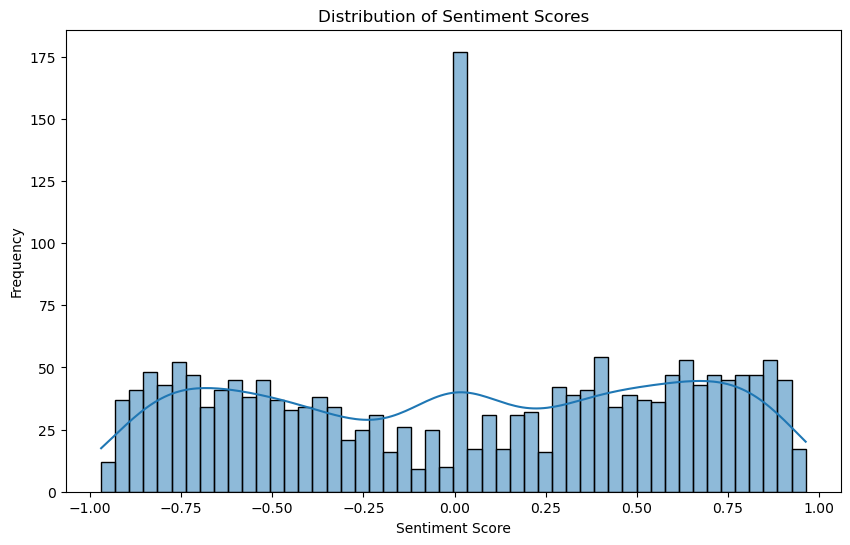

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(netflix_data['sentiment_score'], bins=50, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


In [41]:

# Split the 'listed_in' column into individual genres and explode it
genres_expanded = netflix_data['listed_in'].str.split(', ').explode()

# Merge the expanded genres with sentiment scores
genre_sentiment = pd.DataFrame({'Genre': genres_expanded, 'SentimentScore': netflix_data['sentiment_score'].repeat(genres_expanded.groupby(level=0).size())})

# Calculate the average sentiment score for each genre
avg_genre_sentiment = genre_sentiment.groupby('Genre')['SentimentScore'].mean().sort_values(ascending=False)

 
print(avg_genre_sentiment)


Genre
Stand-Up Comedy & Talk Shows    0.602733
Movies                          0.453543
Reality TV                      0.418669
Stand-Up Comedy                 0.399273
Romantic TV Shows               0.360455
Kids' TV                        0.352631
Faith & Spirituality            0.329367
Korean TV Shows                 0.291554
Science & Nature TV             0.286246
Music & Musicals                0.253729
TV Comedies                     0.248693
Romantic Movies                 0.245474
British TV Shows                0.167531
Sports Movies                   0.161647
Documentaries                   0.128133
LGBTQ Movies                    0.116632
Teen TV Shows                   0.109304
Children & Family Movies        0.101413
Comedies                        0.098061
Docuseries                      0.046431
International TV Shows          0.044380
Anime Series                    0.020476
International Movies           -0.018540
TV Dramas                      -0.050123
Cult Movie

In [37]:
 
top_actors = ['Rupa Bhimani', 'Julie Tejwani', 'Rajesh Kava', 'Jigna Bhardwaj', 'Vatsal Dubey']  

# Create a function to calculate average sentiment 
def average_sentiment_actor(actor_name):
    # Filter rows where the actor is in the cast
    relevant_shows = netflix_data[netflix_data['cast'].str.contains(actor_name, na=False)]
    # Calculate and return the average sentiment score
    return relevant_shows['sentiment_score'].mean()

# Calculate average sentiment 
actor_sentiments = {actor: average_sentiment_actor(actor) for actor in top_actors}

 
print("Actor Sentiment Scores:")
for actor, score in actor_sentiments.items():
    print(f"{actor}: {score:.2f}", end=' | ')




Actor Sentiment Scores:
Rupa Bhimani: 0.09 | Julie Tejwani: 0.09 | Rajesh Kava: 0.05 | Jigna Bhardwaj: 0.09 | Vatsal Dubey: 0.12 | 

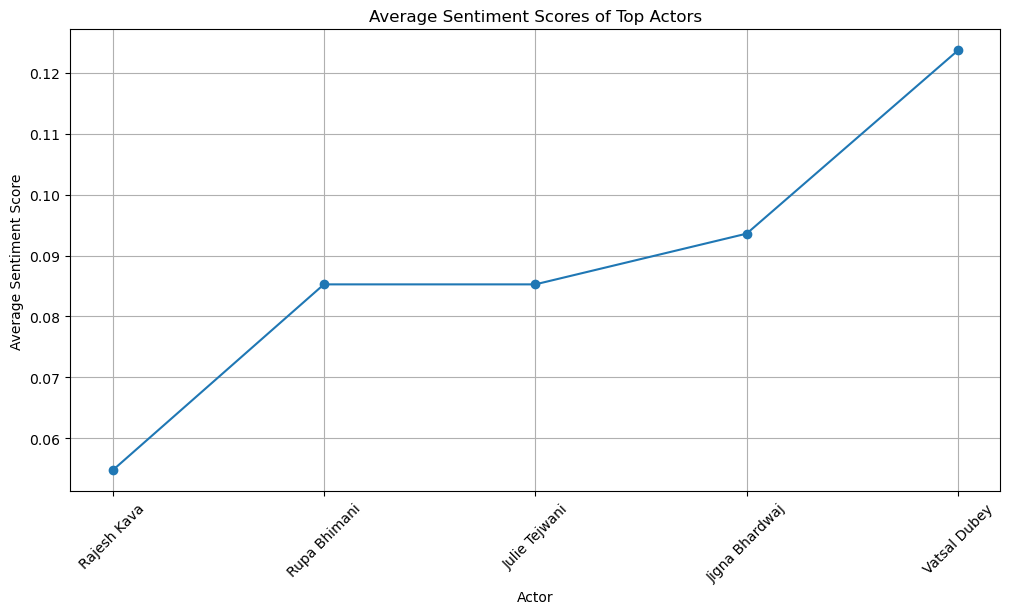

In [38]:
 
actor_sentiment_df = pd.DataFrame(list(actor_sentiments.items()), columns=['Actor', 'Average Sentiment Score'])

 
actor_sentiment_df.sort_values('Average Sentiment Score', inplace=True)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(actor_sentiment_df['Actor'], actor_sentiment_df['Average Sentiment Score'], marker='o')
plt.title('Average Sentiment Scores of Top Actors')
plt.xlabel('Actor')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.grid(True)

In [42]:
import plotly.express as px

# Createdf with 'release_year' and 'sentiment_score'
net_df = netflix_data[['release_year', 'sentiment_score']]
net_df = net_df.rename(columns={'release_year': 'Release Year'})

# Classify sentiment as Positive, Negative, or Neutral based on sentiment score
net_df['Sentiment'] = net_df['sentiment_score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Group by 'Release Year' and 'Sentiment' and count the total content
net_df = net_df.groupby(['Release Year', 'Sentiment']).size().reset_index(name='Total Content')

  
net_df = net_df[net_df['Release Year'] >= 2010]

 
net_fig = px.bar(net_df, x="Release Year", y="Total Content", color="Sentiment", title="Sentiment of Content on Netflix")
net_fig.show()


# TEXT MINING

1. Frequency Analysis



In [44]:
from collections import Counter
import pandas as pd

words = [word for line in netflix_data['processed_description'] for word in line.split()]
word_counts = Counter(words)

 
top_words = word_counts.most_common(10)
 
df_top_words = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

 
print(df_top_words)


     Word  Frequency
0    life        226
1  family        171
2     new        171
3  friend        165
4    find        147
5   young        135
6   world        135
7    take        123
8   woman        120
9    love        119


2. Topic Modeling


In [45]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(netflix_data['basic_cleaned_description'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(X)

# Display the top words in each topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx + 1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-11:-1]]))


Topic #1:
young series help group home journey follows real friends best
Topic #2:
family young new world love true based story woman home
Topic #3:
love world family life takes war student sex save woman
Topic #4:
life school new high team friends teen town soon family
Topic #5:
friends new man world lives series documentary adventure family killer


3. Word Clouds


In [31]:
pip install wordcloud

     -------------------------------------- 153.3/153.3 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


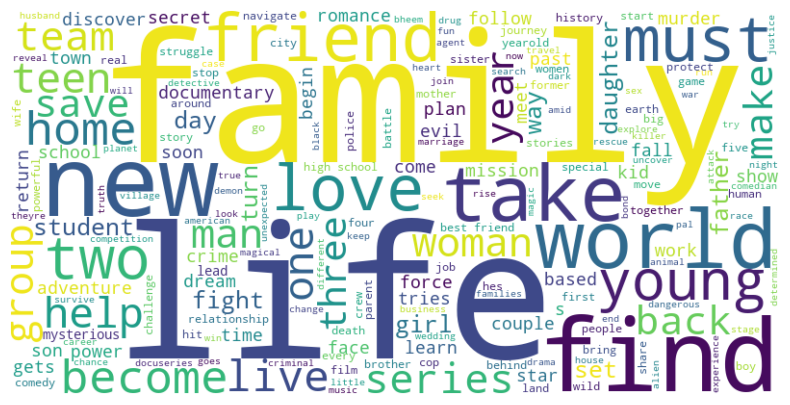

In [32]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(words))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [36]:
pip install spacy

     --------------------------------------- 12.2/12.2 MB 22.6 MB/s eta 0:00:00
     -------------------------------------- 381.6/381.6 kB 7.9 MB/s eta 0:00:00
     ---------------------------------------- 50.1/50.1 kB 2.7 MB/s eta 0:00:00
     -------------------------------------- 122.7/122.7 kB 7.5 MB/s eta 0:00:00
     ------------------------------------- 483.8/483.8 kB 10.1 MB/s eta 0:00:00
     ------------------------------------- 181.6/181.6 kB 11.4 MB/s eta 0:00:00
     ---------------------------------------- 45.9/45.9 kB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 9.5 MB/s eta 0:00:00
     ---------------------------------------- 1.9/1.9 MB 15.0 MB/s eta 0:00:00
     ---------------------------------------- 6.6/6.6 MB 17.6 MB/s eta 0:00:00
     ---------------------------------------- 45.0/45.0 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.4.0
    Uninstalling typing_e

1. Sentiment Over Time Analysis


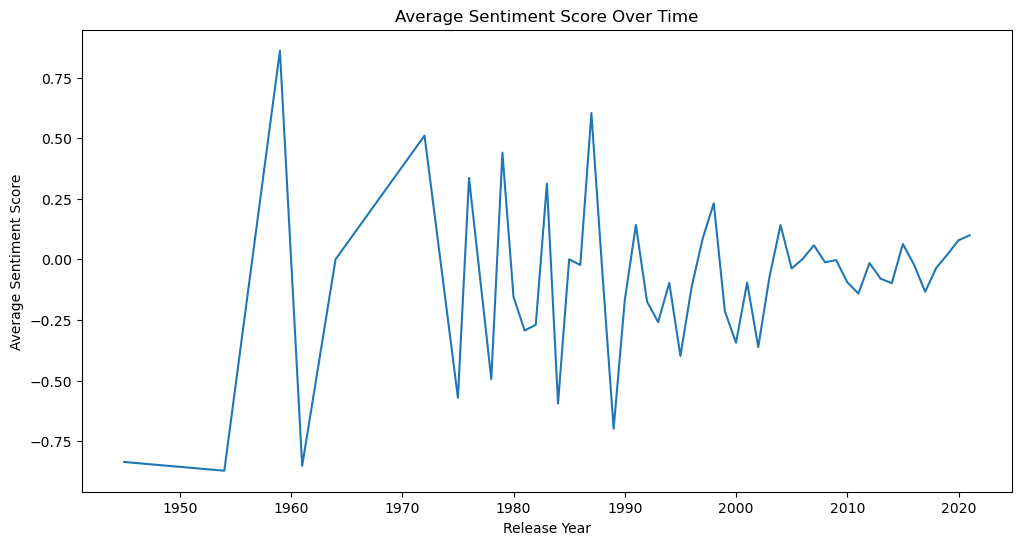

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by release year and calculate the average sentiment score
yearly_sentiment = netflix_data.groupby('release_year')['sentiment_score'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_year', y='sentiment_score', data=yearly_sentiment)
plt.title('Average Sentiment Score Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average Sentiment Score')
plt.show()


2. Named Entity Recognition (NER)


In [42]:
!pip install spacy
!python -m spacy download en_core_web_sm



     --------------------------------------- 12.8/12.8 MB 23.4 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [43]:
import spacy
from collections import defaultdict

# Load the spacy model
nlp = spacy.load('en_core_web_sm')

# Function to extract entities
def extract_entities(description):
    doc = nlp(description)
    return [ent.text for ent in doc.ents]

# Apply NER to each description and store the results
netflix_data['entities'] = netflix_data['basic_cleaned_description'].apply(extract_entities)

# Display some of the extracted entities
print(netflix_data['entities'].head())


0        [johnson]
1               []
2               []
3    [new orleans]
4               []
Name: entities, dtype: object


3. N-gram Analysis

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer for bi-grams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')

# Apply to the descriptions
X = vectorizer.fit_transform(netflix_data['basic_cleaned_description'])

# Get feature names and count frequencies
bi_gram_counts = zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0))

# Sort bi-grams by frequency and get top 10
sorted_bi_grams = sorted(bi_gram_counts, key=lambda x: x[1], reverse=True)[:10]

# Create a DataFrame for the top 10 bi-grams
df_bi_grams = pd.DataFrame(sorted_bi_grams, columns=['Bi-gram', 'Frequency'])

# Display the DataFrame
print(df_bi_grams)


          Bi-gram  Frequency
0     high school         34
1        new york         18
2     best friend         16
3     young woman         16
4      based true         14
5     los angeles         14
6       young man         14
7    best friends         13
8      true story         13
9  reality series         12
